In [9]:
# 读取数据
import pandas as pd
df =pd.read_excel('results.xlsx')
df

,read,reply,title,author,update
0,529,2,中国华融在香港起诉德宝地产前CEO，要求偿还2.84亿美元,中国华融资讯,04-20 10:30
1,384,0,华融金租2022年实现收入总额75.48亿元 同比下降1.64%,中国华融资讯,04-17 02:23
2,560,7,“瘦身健体”忙主业 中国华融转型发展在路上,中国华融资讯,04-17 08:10
3,834,5,穆迪下调中国华融评级至 Baa3 分析认为未来整体向好,中国华融资讯,04-14 10:19
4,1070,2,净亏损超270亿元的中国华融又有原高管被查 日前借道可转债持股光大银行7.08%,中国华融资讯,04-04 06:18
...,...,...,...,...,...
734,5485,0,中国华融、中国信达公布上半年业绩,中国华融资讯,08-30 10:22
735,9531,0,浙江省与中国华融签署战略合作协议,中国华融资讯,08-08 03:02
736,3443,0,债转股资产是否仅限不良待定,中国华融资讯,03-25 07:23
737,2034,0,华融消费金融公司获银监会批准筹建,中国华融资讯,11-03 08:46


In [10]:
# 因为我们只比较2023-1-27-2023-4-27之间的数据，所以我们对评论数据进行截取
compare_data = df.iloc[:77]
compare_data.to_excel('compare_data.xlsx', index=False)

In [11]:
# 读取新的数据
import pandas as pd
df =pd.read_excel('compare_data.xlsx')
df

,read,reply,title,author,update
0,529,2,中国华融在香港起诉德宝地产前CEO，要求偿还2.84亿美元,中国华融资讯,04-20 10:30
1,384,0,华融金租2022年实现收入总额75.48亿元 同比下降1.64%,中国华融资讯,04-17 02:23
2,560,7,“瘦身健体”忙主业 中国华融转型发展在路上,中国华融资讯,04-17 08:10
3,834,5,穆迪下调中国华融评级至 Baa3 分析认为未来整体向好,中国华融资讯,04-14 10:19
4,1070,2,净亏损超270亿元的中国华融又有原高管被查 日前借道可转债持股光大银行7.08%,中国华融资讯,04-04 06:18
...,...,...,...,...,...
72,840,3,中国华融：中信集团成公司第一大股东,中国华融资讯,03-08 05:05
73,1280,3,中国华融：股东权益变动完成 中信集团成第一大股东,中国华融资讯,03-07 08:54
74,1442,3,中信集团正式成为中国华融第一大股东 持股26.46%,中国华融资讯,03-07 08:01
75,2362,15,中国华融：持续改善核心风险管理指标,中国华融资讯,02-12 11:30


In [13]:
pip install snownlp

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#使用SnowNLP计算对每个帖子标题的文字评估情绪得分
import snownlp
from snownlp import SnowNLP

def senti(text):
    s = SnowNLP(text)
    return s.sentiments

df['情绪']=df['title'].apply(senti)
df.to_excel('情感.xlsx')

In [14]:
# 观察分析情况
df =pd.read_excel('情感.xlsx')
df

,Unnamed: 0,read,reply,title,author,update,情绪
0,0,529,2,中国华融在香港起诉德宝地产前CEO，要求偿还2.84亿美元,中国华融资讯,04-20 10:30,0.677086
1,1,384,0,华融金租2022年实现收入总额75.48亿元 同比下降1.64%,中国华融资讯,04-17 02:23,0.935996
2,2,560,7,“瘦身健体”忙主业 中国华融转型发展在路上,中国华融资讯,04-17 08:10,0.979392
3,3,834,5,穆迪下调中国华融评级至 Baa3 分析认为未来整体向好,中国华融资讯,04-14 10:19,0.999912
4,4,1070,2,净亏损超270亿元的中国华融又有原高管被查 日前借道可转债持股光大银行7.08%,中国华融资讯,04-04 06:18,0.328511
...,...,...,...,...,...,...,...
72,72,840,3,中国华融：中信集团成公司第一大股东,中国华融资讯,03-08 05:05,0.920500
73,73,1280,3,中国华融：股东权益变动完成 中信集团成第一大股东,中国华融资讯,03-07 08:54,0.891392
74,74,1442,3,中信集团正式成为中国华融第一大股东 持股26.46%,中国华融资讯,03-07 08:01,0.923838
75,75,2362,15,中国华融：持续改善核心风险管理指标,中国华融资讯,02-12 11:30,0.999068


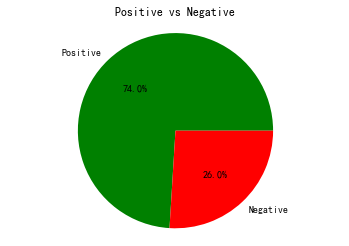

In [15]:
# 统计分析比例
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件并提取需要的列
data =pd.read_excel('情感.xlsx')
column_to_check = '情绪'
column_data = data[column_to_check]

# 计算大于0.5和小于0.5的数量（>0.5为积极，小于0.5为消极）
positive_count = sum(column_data >= 0.5)
negative_count = sum(column_data < 0.5)

# 绘制饼图
labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Positive vs Negative')
plt.show()

In [ ]:
# 判断股价增长与否

In [69]:
# 验证

In [1]:
import pandas as pd

# 读取情感和股票数据
df_sentiment = pd.read_excel('情感.xlsx')
df_stock = pd.read_excel('stock.xlsx')

# 将情感日期转换为年月日格式
df_sentiment['日期'] = pd.to_datetime('2023-' + df_sentiment['update'], format='%Y-%m-%d %H:%M').dt.date

# 将股票日期转换为年月日格式
df_stock['日期'] = pd.to_datetime(df_stock['交易日期']).dt.date

# 合并情感和股票数据
df = pd.merge(df_sentiment, df_stock, on='日期')

# 提取需要的列
df = df[['日期', '情绪', '涨跌幅']]

C:\Users\ducking\AppData\Local\Temp/ipykernel_22096/3875082459.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df_stock = pd.read_excel('stock.xlsx')


In [2]:
# 对情绪列进行涨跌判断
df['情绪涨跌'] = df['情绪'].apply(lambda x: '涨' if x > 0.5 else '跌')
# 对涨跌幅列进行涨跌判断
df['涨跌幅涨跌'] = df['涨跌幅'].apply(lambda x: '涨' if float(x.strip('%')) >= 0 else '跌')
# 取出需要的列
df_result = df[['日期', '情绪', '情绪涨跌','涨跌幅涨跌', '涨跌幅']]
df_result

,日期,情绪,情绪涨跌,涨跌幅涨跌,涨跌幅
0,2023-04-20,0.677086,涨,涨,0.00%
1,2023-04-17,0.935996,涨,跌,-1.15%
2,2023-04-17,0.979392,涨,跌,-1.15%
3,2023-04-14,0.999912,涨,涨,1.16%
4,2023-04-04,0.328511,跌,涨,1.14%
5,2023-03-31,0.969671,涨,涨,0.00%
6,2023-03-31,0.996087,涨,涨,0.00%
7,2023-03-31,0.747885,涨,涨,0.00%
8,2023-03-30,0.949037,涨,跌,-2.20%
9,2023-03-30,0.942209,涨,跌,-2.20%


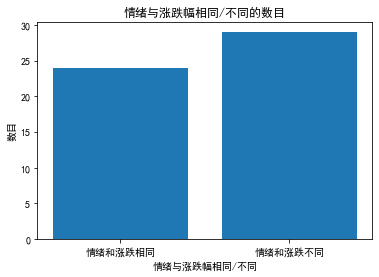

准确率为：45.28%


In [18]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimHei'
# 判断涨跌幅涨跌和情绪涨跌相同和不同的数目
same_count = ((df['情绪涨跌'] == df['涨跌幅涨跌']).sum())
diff_count = len(df) - same_count
accuracy = same_count / len(df)
# 绘制柱状图
plt.bar(['情绪和涨跌相同', '情绪和涨跌不同'], [same_count, diff_count])
plt.title('情绪与涨跌幅相同/不同的数目')
plt.xlabel('情绪与涨跌幅相同/不同')
plt.ylabel('数目')
plt.show()
print('准确率为：{:.2f}%'.format(accuracy * 100))